<a href="https://colab.research.google.com/github/map72ru/biz_learn/blob/main/NNW_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/hw2')

data = pd.read_csv('hw2/MyDrive/data/airline-passengers.csv',skipfooter=5)
data

Mounted at /content/hw2


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
134,1960-03,419
135,1960-04,461
136,1960-05,472
137,1960-06,535


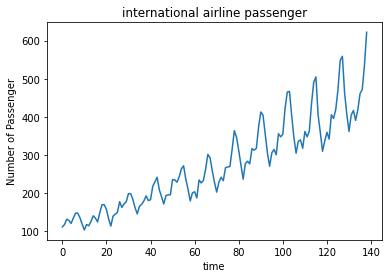

In [4]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

Preprocessing Data

In [5]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(139, 1)

In [6]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [9]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(137, 1),y:(137,)
X_train:(92, 1),y_train:(92,),X_test:(45, 1),y_test(45,)


In [10]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(92, 1),y_train:(92, 1),X_test:(45, 1),y_test(45, 1)


In [11]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
Create LSTM Model

In [12]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
92/92 [==============================] - 2s 2ms/step - loss: 0.0448
Epoch 2/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 4/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 5/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 6/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 7/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 9/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 10/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 11/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 12/50
92/92 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/50
92/92 [==============================

Predictions and Visualising LSTM Model

In [13]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

(92, 1, 1)
(92, 1)
(45, 1, 1)
(45, 1)


In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [16]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.35 RMSE
Test Score: 43.39 RMSE


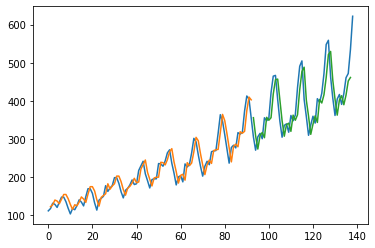

In [17]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()